In [124]:
import pandas as pd
import datetime as dt
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt

In [125]:
df = pd.read_csv('fifa21 raw data v2.csv',chunksize=6300)

In [126]:
df1 = next(df)
df2 = next(df)
df3 = next(df)
df4 = next(df)

In [127]:
dataset = pd.concat([df1,df2,df3,df4])

In [128]:
dataset.columns = dataset.columns.str.lower()

In [129]:
dataset.head()

,id,name,longname,photourl,playerurl,nationality,age,↓ova,pot,club,...,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,...,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\n\n\n\nJuventus,...,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,...,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,\n\n\n\nManchester City,...,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,...,High,Medium,5 ★,91,85,86,94,36,59,595


In [130]:
def Stripcolumn(df,column):
    for item in column:
        df[item] = df[item].str.strip()
        return df
    


In [131]:
def text_to_category(df,columns):
    for column in columns:
        df[column] = df[column].astype('category')
        return df

Players Injury Resistance

In [132]:
def remove_stars(dataset,column):
    """Strips the stars text from a column"""
    dataset[column] = dataset[column].astype('str').str.strip('★ ')
    dataset[column] = dataset[column].astype('int')
    dataset[column] = dataset[column].astype('category')

In [133]:
remove_stars(dataset,'ir')

In [134]:
dataset['ir'].unique()

[5, 3, 4, 2, 1]
Categories (5, int64): [1, 2, 3, 4, 5]

Players Weak Foot

In [135]:
remove_stars(dataset,'w/f')
dataset['w/f'].unique()

[4, 3, 5, 2, 1]
Categories (5, int64): [1, 2, 3, 4, 5]

Players Skill Move

In [136]:
remove_stars(dataset,'sm')
dataset['sm'].unique()

[4, 5, 1, 2, 3]
Categories (5, int64): [1, 2, 3, 4, 5]

In [137]:
text_to_category(dataset,columns=['a/w','d/w','preferred foot'])

,id,name,longname,photourl,playerurl,nationality,age,↓ova,pot,club,...,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,...,Medium,Low,5,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\n\n\n\nJuventus,...,High,Low,5,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,...,Medium,Medium,3,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,\n\n\n\nManchester City,...,High,High,4,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,...,High,Medium,5,91,85,86,94,36,59,595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,247223,Xia Ao,Ao Xia,https://cdn.sofifa.com/players/247/223/21_60.png,http://sofifa.com/player/247223/ao-xia/210006/,China PR,21,47,55,\n\n\n\nWuhan Zall,...,Medium,Medium,1,64,28,26,38,48,51,NaN
18975,258760,B. Hough,Ben Hough,https://cdn.sofifa.com/players/258/760/21_60.png,http://sofifa.com/player/258760/ben-hough/210006/,England,17,47,67,\n\n\n\nOldham Athletic,...,Medium,Medium,1,64,40,48,49,35,45,NaN
18976,252757,R. McKinley,Ronan McKinley,https://cdn.sofifa.com/players/252/757/21_60.png,http://sofifa.com/player/252757/ronan-mckinley...,England,18,47,65,\n\n\n\nDerry City,...,Medium,Medium,1,63,39,44,46,40,53,NaN
18977,243790,Wang Zhen'ao,Zhen'ao Wang,https://cdn.sofifa.com/players/243/790/21_60.png,http://sofifa.com/player/243790/zhenao-wang/21...,China PR,20,47,57,\n\n\n\nDalian YiFang FC,...,Medium,Medium,1,58,49,41,49,30,44,NaN


In [138]:
Stripcolumn(dataset,column = ['club','name','longname','nationality','wage','value','release clause'])


,id,name,longname,photourl,playerurl,nationality,age,↓ova,pot,club,...,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,FC Barcelona,...,Medium,Low,5,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,Juventus,...,High,Low,5,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,Atlético Madrid,...,Medium,Medium,3,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,Manchester City,...,High,High,4,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,Paris Saint-Germain,...,High,Medium,5,91,85,86,94,36,59,595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,247223,Xia Ao,Ao Xia,https://cdn.sofifa.com/players/247/223/21_60.png,http://sofifa.com/player/247223/ao-xia/210006/,China PR,21,47,55,Wuhan Zall,...,Medium,Medium,1,64,28,26,38,48,51,NaN
18975,258760,B. Hough,Ben Hough,https://cdn.sofifa.com/players/258/760/21_60.png,http://sofifa.com/player/258760/ben-hough/210006/,England,17,47,67,Oldham Athletic,...,Medium,Medium,1,64,40,48,49,35,45,NaN
18976,252757,R. McKinley,Ronan McKinley,https://cdn.sofifa.com/players/252/757/21_60.png,http://sofifa.com/player/252757/ronan-mckinley...,England,18,47,65,Derry City,...,Medium,Medium,1,63,39,44,46,40,53,NaN
18977,243790,Wang Zhen'ao,Zhen'ao Wang,https://cdn.sofifa.com/players/243/790/21_60.png,http://sofifa.com/player/243790/zhenao-wang/21...,China PR,20,47,57,Dalian YiFang FC,...,Medium,Medium,1,58,49,41,49,30,44,NaN


In [139]:
dataset.columns

Index(['id', 'name', 'longname', 'photourl', 'playerurl', 'nationality', 'age',
       '↓ova', 'pot', 'club', 'contract', 'positions', 'height', 'weight',
       'preferred foot', 'bov', 'best position', 'joined', 'loan date end',
       'value', 'wage', 'release clause', 'attacking', 'crossing', 'finishing',
       'heading accuracy', 'short passing', 'volleys', 'skill', 'dribbling',
       'curve', 'fk accuracy', 'long passing', 'ball control', 'movement',
       'acceleration', 'sprint speed', 'agility', 'reactions', 'balance',
       'power', 'shot power', 'jumping', 'stamina', 'strength', 'long shots',
       'mentality', 'aggression', 'interceptions', 'positioning', 'vision',
       'penalties', 'composure', 'defending', 'marking', 'standing tackle',
       'sliding tackle', 'goalkeeping', 'gk diving', 'gk handling',
       'gk kicking', 'gk positioning', 'gk reflexes', 'total stats',
       'base stats', 'w/f', 'sm', 'a/w', 'd/w', 'ir', 'pac', 'sho', 'pas',
       'dri', 'def', 

In [140]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   id                18979 non-null  int64   
 1   name              18979 non-null  object  
 2   longname          18979 non-null  object  
 3   photourl          18979 non-null  object  
 4   playerurl         18979 non-null  object  
 5   nationality       18979 non-null  object  
 6   age               18979 non-null  int64   
 7   ↓ova              18979 non-null  int64   
 8   pot               18979 non-null  int64   
 9   club              18979 non-null  object  
 10  contract          18979 non-null  object  
 11  positions         18979 non-null  object  
 12  height            18979 non-null  object  
 13  weight            18979 non-null  object  
 14  preferred foot    18979 non-null  object  
 15  bov               18979 non-null  int64   
 16  best position     1897

Players Wages, Values and Release Claue

In [141]:
#Wages
dataset['wage'] = dataset['wage'].astype(str).str.strip('€')
dataset['wage'] = dataset['wage'].str.replace("K","000").astype('int')

dataset['wage']

0        560000
1        220000
2        125000
3        370000
4        270000
          ...  
18974      1000
18975       500
18976       500
18977      2000
18978      1000
Name: wage, Length: 18979, dtype: int32

In [142]:
# Values
dataset['value'] = dataset['value'].astype(str).str.strip('€')
dataset['value'] = dataset['value'].str.replace('M','000000')
dataset['value'] = dataset['value'].str.replace('K','000').astype('float')
dataset['value'] = dataset['value'].astype('int')

dataset['value']

0              103
1         63000000
2        120000000
3        129000000
4        132000000
           ...    
18974       100000
18975       130000
18976       120000
18977       100000
18978       100000
Name: value, Length: 18979, dtype: int32

In [143]:
# Release Claue
dataset['release clause'] = dataset['release clause'].astype(str).str.strip('€')
dataset['release clause'] = dataset['release clause'].str.replace('M','000000')
dataset['release clause'] = dataset['release clause'].str.replace('K','000').astype('float')
dataset['release clause'] = dataset['release clause'].astype('int')

dataset['release clause']

0              138
1               75
2              159
3        161000000
4              166
           ...    
18974        70000
18975       165000
18976       131000
18977        88000
18978        79000
Name: release clause, Length: 18979, dtype: int32

Players Contract 

In [144]:
dataset['contract'].dtype

dataset['contract'].unique()

array(['2004 ~ 2021', '2018 ~ 2022', '2014 ~ 2023', '2015 ~ 2023',
       '2017 ~ 2022', '2017 ~ 2023', '2018 ~ 2024', '2014 ~ 2022',
       '2018 ~ 2023', '2016 ~ 2023', '2013 ~ 2023', '2011 ~ 2023',
       '2009 ~ 2022', '2005 ~ 2021', '2011 ~ 2021', '2015 ~ 2022',
       '2017 ~ 2024', '2010 ~ 2024', '2012 ~ 2021', '2019 ~ 2024',
       '2015 ~ 2024', '2017 ~ 2025', '2020 ~ 2025', '2019 ~ 2023',
       '2008 ~ 2023', '2015 ~ 2021', '2020 ~ 2022', '2012 ~ 2022',
       '2016 ~ 2025', '2013 ~ 2022', '2011 ~ 2022', '2012 ~ 2024',
       '2016 ~ 2021', '2012 ~ 2023', '2008 ~ 2022', '2019 ~ 2022',
       '2017 ~ 2021', '2013 ~ 2024', '2020 ~ 2024', '2010 ~ 2022',
       '2020 ~ 2021', '2011 ~ 2024', '2020 ~ 2023', '2014 ~ 2024',
       '2013 ~ 2026', '2016 ~ 2022', '2010 ~ 2021', '2013 ~ 2021',
       '2019 ~ 2025', '2018 ~ 2025', '2016 ~ 2024', '2018 ~ 2021',
       '2009 ~ 2024', '2007 ~ 2022', 'Jun 30, 2021 On Loan',
       '2009 ~ 2021', '2019 ~ 2021', '2019 ~ 2026', 'Free', '2012 ~ 

In [145]:
for index, row in dataset.iterrows():
    if 'On Loan' in row['contract'] or 'Free' in row['contract']:
        print(row['contract'])

Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Free
Free
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Free
Free
Free
Free
Free
Free
Free
Free
Free
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Free
Free
Free
Free
Jun 30, 2021 On Loan
Dec 31, 2020 On Loan
Jun 30, 2021 On Loan
Free
Jun 30, 2021 On Loan
Free
Free
Free
Free
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Free
Jun 30, 2021 On Loan
Free
Jun 30, 2021 On Loan
Jan 30, 2021 On Loan
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Free
Dec 31, 2020 On Loan
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Free
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Free
Jun 30, 2021 On Loan
Free
Free
Free

In [146]:
def extract_contract_info(contract):
    if contract == 'Free' or 'On Loan' in contract:
        start_date = np.nan
        end_date = np.nan
        contract_length = 0
        
    else:
        start_date, end_date = contract.split(' ~ ')
        start_year = int(start_date[:4])
        end_year = int(end_date[:4])
        contract_length = end_year - start_year
    return start_date, end_date, contract_length

# Apply fn to Contract column & create new columns

new_cols = ['contract start', 'contract end', 'contract length(years)']
new_data = dataset['contract'].apply(lambda x: pd.Series(extract_contract_info(x)))

for i in range(len(new_cols)):
    dataset.insert(loc=dataset.columns.get_loc('contract')+1+i, column = new_cols[i], value= new_data[i])
    

In [147]:
dataset[['contract','contract start','contract end','contract length(years)']].sample(5)

,contract,contract start,contract end,contract length(years)
3581,2011 ~ 2022,2011,2022,11.0
4992,2020 ~ 2022,2020,2022,2.0
18851,2018 ~ 2020,2018,2020,2.0
10372,2020 ~ 2022,2020,2022,2.0
10118,2019 ~ 2021,2019,2021,2.0


In [148]:
# Contract Categories

def categorize_contract_status(contract):
    if contract == 'Free':
        return 'Free'
    elif 'On Loan' in contract:
        return contract
    else:
        return 'Contract'
    
# Add insert contract column
dataset.insert(dataset.columns.get_loc('contract length(years)')+1, 'contract status',dataset['contract'].apply(categorize_contract_status))
dataset.sample(5)        

,id,name,longname,photourl,playerurl,nationality,age,↓ova,pot,club,...,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits
18403,255497,Park Kyung Bae,Kyung Bae Park,https://cdn.sofifa.com/players/255/497/21_60.png,http://sofifa.com/player/255497/kyung-bae-park...,Korea Republic,19,52,70,Gangwon FC,...,High,Medium,1,55,53,40,51,25,52,NaN
15648,244000,T. Fleckstein,Tobias Fleckstein,https://cdn.sofifa.com/players/244/000/21_60.png,http://sofifa.com/player/244000/tobias-fleckst...,Germany,21,59,69,MSV Duisburg,...,Medium,Medium,1,56,24,43,52,61,52,5
15672,258053,J. Aguayo,Juan de Dios Aguayo,https://cdn.sofifa.com/players/258/053/21_60.png,http://sofifa.com/player/258053/juan-de-dios-a...,Mexico,23,59,70,Guadalajara,...,Medium,Medium,1,57,30,39,42,62,56,1
18738,252377,D. Vergara,Diego Vergara,https://cdn.sofifa.com/players/252/377/21_60.png,http://sofifa.com/player/252377/diego-vergara/...,Chile,17,51,70,Coquimbo Unido,...,Medium,Medium,1,62,35,53,53,46,48,NaN
5658,175934,K. Steppe,Kenny Steppe,https://cdn.sofifa.com/players/175/934/21_60.png,http://sofifa.com/player/175934/kenny-steppe/2...,Belgium,31,69,69,Sint-Truidense VV,...,Medium,Medium,1,69,68,64,70,44,68,2


Players Positions

In [149]:
dataset['positions'].unique()

array(['RW, ST, CF', 'ST, LW', 'GK', 'CAM, CM', 'LW, CAM', 'ST', 'RW',
       'ST, LW, RW', 'CB', 'LW', 'CDM', 'CF, ST', 'LW, RW', 'CDM, CM',
       'CDM, RB', 'CF, CAM', 'LW, ST', 'CM', 'ST, CF, LW', 'RM, LM, CAM',
       'RB', 'RW, CAM, CM', 'LB', 'LM, CF', 'CF', 'RW, LW', 'CAM, RM, RW',
       'CM, CDM', 'CAM, CF, ST', 'CM, CDM, CAM', 'CF, LW, CAM',
       'CAM, RM, CF', 'LM, ST', 'RM, LM, RW', 'LM', 'CAM, RW', 'CB, CDM',
       'RW, RM', 'LW, CF', 'CM, RM, LM', 'LB, LM', 'CAM, CM, RM',
       'CAM, CM, CF', 'CAM, CF', 'LM, RM, LW', 'LM, LB, CM', 'CM, LM, LB',
       'RM, RW', 'RM, CM', 'CAM, CM, LW', 'CB, LB', 'RM, RB', 'ST, RW',
       'LM, RW, LW', 'RB, LB', 'RB, RM', 'RM', 'LM, RM, CF', 'CAM, RM',
       'RB, RWB', 'CDM, CB, CM', 'CAM, RM, ST', 'LM, LW, RM', 'CM, CAM',
       'ST, RM, CF', 'LM, RM', 'RM, CF', 'LM, LWB', 'RW, RM, CF',
       'RB, CM', 'LW, CAM, RW', 'CAM, LW, CM', 'CM, CAM, CDM',
       'RW, LW, CAM', 'CM, CAM, LM', 'CM, RM, ST', 'CDM, CM, RB',
       'ST, CAM', 

Player Join Date

In [150]:
dataset['joined'].unique()

array(['Jul 1, 2004', 'Jul 10, 2018', 'Jul 16, 2014', ..., 'Sep 22, 2018',
       'Feb 28, 2015', 'Mar 6, 2018'], dtype=object)

In [151]:
dataset['joined'] = pd.to_datetime(dataset['joined'])
dataset['joined']

0       2004-07-01
1       2018-07-10
2       2014-07-16
3       2015-08-30
4       2017-08-03
           ...    
18974   2018-07-13
18975   2020-08-01
18976   2019-03-08
18977   2020-09-22
18978   2019-07-29
Name: joined, Length: 18979, dtype: datetime64[ns]

Players Loan Date

In [152]:
dataset['loan date end'].dtype
dataset['loan date end'].unique()

array([nan, 'Jun 30, 2021', 'Dec 31, 2020', 'Jan 30, 2021',
       'Jun 30, 2022', 'May 31, 2021', 'Jul 5, 2021', 'Dec 31, 2021',
       'Jul 1, 2021', 'Jan 1, 2021', 'Aug 31, 2021', 'Jan 31, 2021',
       'Dec 30, 2021', 'Jun 23, 2021', 'Jan 3, 2021', 'Nov 27, 2021',
       'Jan 17, 2021', 'Jun 30, 2023', 'Jul 31, 2021', 'Nov 22, 2020',
       'May 31, 2022', 'Dec 30, 2020', 'Jan 4, 2021', 'Nov 30, 2020',
       'Aug 1, 2021'], dtype=object)

In [153]:
dataset['loan date end'] = pd.to_datetime(dataset['loan date end'])

Hits

In [154]:
# Converting Datatype of hits column
dataset['hits'] = dataset['hits'].fillna(0)
dataset['hits'] = dataset['hits'].astype('str').str.replace('K','000').astype('float')
dataset['hits'] = dataset['hits'].astype('int')
dataset['hits'].unique()



array([ 771,  562,  150,  207,  595,  248,  246,  120,    1,  130,  321,
        189,  175,   96,  118,  216,  212,  154,  205,  202,  339,  408,
        103,  332,   86,  173,  161,  396,  433,  242,  206,  177,  198,
        459,  117,  119,  209,   84,  187,  165,  203,   65,  336,  126,
        313,  124,  145,  538,  182,  101,   45,  377,   99,  194,  403,
        414,  593,  374,  245,    3,  266,  299,  309,  215,  265,  211,
        112,  337,   70,  159,  688,  116,   63,  144,  123,   71,  224,
        113,  168,   61,   89,  137,  278,   75,  148,  176,  197,  264,
        214,  247,  402,  440,    2,  171,  320,  657,   87,  259,  200,
        255,  253,  196,   60,   97,   85,  169,  256,  132,  239,  166,
        121,  109,   32,   46,  122,   48,  527,  199,  282,   51,  642,
        155,  323,  288,  497,  509,   79,   49,  270,  511,   80,  128,
        115,  156,  204,  143,  140,  152,  220,  134,  225,   94,   74,
        135,  142,   50,   77,   40,  107,  193,  1

Players Height

In [155]:
def convert_height(height):
    if 'cm' in height:
        return int(height.strip('cm'))
    else:
        if "'" in height:
            feet,inches = height.split("'")
            total_inches = int(feet) * 12 + int(inches.strip('"'))
            return round(total_inches * 2.54)
        else:
            return None

dataset['height'] = dataset['height'].apply(convert_height)
dataset['height'].unique()


array([170, 187, 188, 181, 175, 184, 191, 178, 193, 185, 199, 173, 168,
       176, 177, 183, 180, 189, 179, 195, 172, 182, 186, 192, 165, 194,
       167, 196, 163, 190, 174, 169, 171, 197, 200, 166, 164, 198, 201,
       158, 162, 161, 160, 203, 157, 156, 202, 159, 206, 155], dtype=int64)

In [156]:
dataset = dataset.rename(columns={'height':'height(cm)'})
dataset.sample(1)

,id,name,longname,photourl,playerurl,nationality,age,↓ova,pot,club,...,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits
3225,241928,A. Sambi Lokonga,Albert Sambi Lokonga,https://cdn.sofifa.com/players/241/928/21_60.png,http://sofifa.com/player/241928/albert-sambi-l...,Belgium,20,72,83,RSC Anderlecht,...,Medium,Medium,1,66,47,71,76,67,67,84


Players Weight

In [157]:
dataset['weight'].unique()

array(['72kg', '83kg', '87kg', '70kg', '68kg', '80kg', '71kg', '91kg',
       '73kg', '85kg', '92kg', '69kg', '84kg', '96kg', '81kg', '82kg',
       '75kg', '86kg', '89kg', '74kg', '76kg', '64kg', '78kg', '90kg',
       '66kg', '60kg', '94kg', '79kg', '67kg', '65kg', '59kg', '61kg',
       '93kg', '88kg', '97kg', '77kg', '62kg', '63kg', '95kg', '100kg',
       '58kg', '183lbs', '179lbs', '172lbs', '196lbs', '176lbs', '185lbs',
       '170lbs', '203lbs', '168lbs', '161lbs', '146lbs', '130lbs',
       '190lbs', '174lbs', '148lbs', '165lbs', '159lbs', '192lbs',
       '181lbs', '139lbs', '154lbs', '157lbs', '163lbs', '98kg', '103kg',
       '99kg', '102kg', '56kg', '101kg', '57kg', '55kg', '104kg', '107kg',
       '110kg', '53kg', '50kg', '54kg', '52kg'], dtype=object)

In [158]:
def convert_weight(weight):
    if 'kg' in weight:
        return int(weight.strip('kg'))
    else:
        pounds = int(weight.strip('lbs'))
        return round(pounds/2.205)
    
dataset['weight'] = dataset['weight'].apply(convert_weight)
dataset['weight'].unique()

array([ 72,  83,  87,  70,  68,  80,  71,  91,  73,  85,  92,  69,  84,
        96,  81,  82,  75,  86,  89,  74,  76,  64,  78,  90,  66,  60,
        94,  79,  67,  65,  59,  61,  93,  88,  97,  77,  62,  63,  95,
       100,  58,  98, 103,  99, 102,  56, 101,  57,  55, 104, 107, 110,
        53,  50,  54,  52], dtype=int64)

In [159]:
dataset = dataset.rename(columns={'weight':'weight(kg)'})
dataset.sample(1)

,id,name,longname,photourl,playerurl,nationality,age,↓ova,pot,club,...,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits
17670,243813,T. O'Neill,Tyrone O'Neill,https://cdn.sofifa.com/players/243/813/21_60.png,http://sofifa.com/player/243813/tyrone-oneill/...,England,20,55,71,Middlesbrough,...,Medium,Medium,1,61,57,37,49,20,52,0


In [160]:
dataset.describe()

,id,age,↓ova,pot,contract length(years),height(cm),weight(kg),bov,value,wage,...,gk reflexes,total stats,base stats,pac,sho,pas,dri,def,phy,hits
count,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,1.897900e+04,18979.000000,...,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000
mean,226403.384794,25.194109,65.718636,71.136414,3.491965,181.200221,75.019021,66.751726,1.246286e+06,9092.062279,...,16.519627,1595.286949,355.702197,67.453975,53.457031,57.681016,62.875020,49.866221,64.368934,20.304336
std,27141.054157,4.710520,6.968999,6.114635,2.401495,6.840054,7.073542,6.747193,5.598580e+06,19707.021089,...,17.854079,269.874789,40.761117,10.677859,13.827425,10.081857,9.927415,16.443213,9.601883,77.923294
min,41.000000,16.000000,47.000000,47.000000,0.000000,155.000000,50.000000,48.000000,0.000000e+00,0.000000,...,2.000000,747.000000,232.000000,25.000000,16.000000,25.000000,25.000000,12.000000,28.000000,0.000000
25%,210135.000000,21.000000,61.000000,67.000000,2.000000,176.000000,70.000000,62.000000,2.000000e+00,1000.000000,...,8.000000,1452.000000,327.000000,61.000000,44.000000,51.000000,57.000000,35.000000,58.000000,1.000000
50%,232418.000000,25.000000,66.000000,71.000000,3.000000,181.000000,75.000000,67.000000,2.500000e+05,3000.000000,...,11.000000,1627.000000,356.000000,68.000000,56.000000,58.000000,64.000000,53.000000,65.000000,4.000000
75%,246922.500000,29.000000,70.000000,75.000000,5.000000,186.000000,80.000000,71.000000,6.250000e+05,8000.000000,...,14.000000,1781.000000,384.000000,75.000000,64.000000,64.000000,69.000000,63.000000,71.000000,12.000000
max,259216.000000,53.000000,93.000000,95.000000,23.000000,206.000000,110.000000,93.000000,1.320000e+08,560000.000000,...,90.000000,2316.000000,498.000000,96.000000,93.000000,93.000000,95.000000,91.000000,91.000000,6000.000000


In [161]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 81 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      18979 non-null  int64         
 1   name                    18979 non-null  object        
 2   longname                18979 non-null  object        
 3   photourl                18979 non-null  object        
 4   playerurl               18979 non-null  object        
 5   nationality             18979 non-null  object        
 6   age                     18979 non-null  int64         
 7   ↓ova                    18979 non-null  int64         
 8   pot                     18979 non-null  int64         
 9   club                    18979 non-null  object        
 10  contract                18979 non-null  object        
 11  contract start          17729 non-null  object        
 12  contract end            17729 non-null  object

Duplicate Data

In [162]:
# Duplicates
duplicates = dataset.duplicated(subset=['longname','nationality'],keep=False)
dataset[duplicates].sort_values(by='longname')


,id,name,longname,photourl,playerurl,nationality,age,↓ova,pot,club,...,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits
16750,238357,A. Majrashi,Abdulaziz Majrashi,https://cdn.sofifa.com/players/238/357/21_60.png,http://sofifa.com/player/238357/abdulaziz-majr...,Saudi Arabia,24,57,66,Ettifaq FC,...,Medium,Medium,1,57,34,49,54,56,63,0
14876,210206,A. Majrashi,Abdulaziz Majrashi,https://cdn.sofifa.com/players/210/206/21_60.png,http://sofifa.com/player/210206/abdulaziz-majr...,Saudi Arabia,28,60,60,Al Adalah,...,Medium,Medium,1,77,30,48,58,56,57,1
17560,208932,A. Al Shammari,Abdullah Al Shammari,https://cdn.sofifa.com/players/208/932/21_60.png,http://sofifa.com/player/208932/abdullah-al-sh...,Saudi Arabia,28,55,57,Abha Club,...,Medium,Medium,1,56,52,52,55,46,53,0
13405,220023,A. Al Shammari,Abdullah Al Shammari,https://cdn.sofifa.com/players/220/023/21_60.png,http://sofifa.com/player/220023/abdullah-al-sh...,Saudi Arabia,26,62,65,Al Hazem,...,Low,Medium,1,54,38,48,52,63,67,1
4200,225151,A. Traoré,Adama Traoré,https://cdn.sofifa.com/players/225/151/21_60.png,http://sofifa.com/player/225151/adama-traore/2...,Mali,25,71,74,Hatayspor,...,High,Medium,1,76,62,73,73,60,68,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9953,240207,Liu Yang,Yang Liu,https://cdn.sofifa.com/players/240/207/21_60.png,http://sofifa.com/player/240207/yang-liu/210006/,China PR,25,65,69,Shandong Luneng TaiShan FC,...,Medium,Medium,1,74,53,57,64,62,63,2
18697,241341,Zhang Yuan,Yuan Zhang,https://cdn.sofifa.com/players/241/341/21_60.png,http://sofifa.com/player/241341/yuan-zhang/210...,China PR,23,51,56,Shenzhen FC,...,Medium,Medium,1,73,45,48,56,50,59,0
15719,222277,Zhang Yuan,Yuan Zhang,https://cdn.sofifa.com/players/222/277/21_60.png,http://sofifa.com/player/222277/yuan-zhang/210...,China PR,30,59,59,Shenzhen FC,...,High,Medium,1,76,39,50,60,55,64,1
14889,243220,Y. Kobayashi,Yuki Kobayashi,https://cdn.sofifa.com/players/243/220/21_60.png,http://sofifa.com/player/243220/yuki-kobayashi...,Japan,19,60,71,Yokohama FC,...,Medium,Medium,1,54,39,51,53,60,61,2


In [163]:
dataset.drop_duplicates(subset=['longname','nationality'],keep='first',inplace=True)

In [164]:
duplicates = dataset.duplicated(subset=['longname','height(cm)'],keep=False)
dataset[duplicates].sort_values(by='longname')

,id,name,longname,photourl,playerurl,nationality,age,↓ova,pot,club,...,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits
13033,229126,J. Clarke,James Clarke,https://cdn.sofifa.com/players/229/126/21_60.png,http://sofifa.com/player/229126/james-clarke/2...,England,30,62,62,Walsall,...,Medium,High,1,58,43,50,51,61,72,3
15056,243292,J. Clarke,James Clarke,https://cdn.sofifa.com/players/243/292/21_60.png,http://sofifa.com/player/243292/james-clarke/2...,Republic of Ireland,20,60,70,Mansfield Town,...,Medium,Medium,1,72,36,49,53,54,66,4
6956,231587,L. Caicedo,Luis Caicedo,https://cdn.sofifa.com/players/231/587/21_60.png,http://sofifa.com/player/231587/luis-caicedo/2...,Colombia,24,68,74,New England Revolution,...,Medium,High,1,65,49,57,69,63,76,16
10699,236271,L. Caicedo,Luis Caicedo,https://cdn.sofifa.com/players/236/271/21_60.png,http://sofifa.com/player/236271/luis-caicedo/2...,Ecuador,28,65,66,LDU Quito,...,Medium,Medium,1,40,28,47,33,65,75,5
703,241084,L. Díaz,Luis Díaz,https://cdn.sofifa.com/players/241/084/21_60.png,http://sofifa.com/player/241084/luis-diaz/210006/,Colombia,23,78,86,FC Porto,...,High,Medium,1,92,76,68,79,32,69,247
6338,251387,L. Díaz,Luis Díaz,https://cdn.sofifa.com/players/251/387/21_60.png,http://sofifa.com/player/251387/luis-diaz/210006/,Costa Rica,21,69,78,Columbus Crew SC,...,Medium,Medium,1,85,62,65,69,29,60,44
6859,214413,S. Martínez,Sebastián Martínez,https://cdn.sofifa.com/players/214/413/21_60.png,http://sofifa.com/player/214413/sebastian-mart...,Chile,27,68,69,CD Huachipato,...,Medium,High,1,68,57,64,66,64,67,2
13664,257706,S. Martínez,Sebastián Martínez,https://cdn.sofifa.com/players/257/706/21_60.png,http://sofifa.com/player/257706/sebastian-mart...,Mexico,19,62,76,Guadalajara,...,Medium,Medium,1,61,58,60,62,42,51,10


In [165]:
dataset.drop_duplicates(subset=['longname','height(cm)'],keep='first',inplace=True)

In [166]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18916 entries, 0 to 18978
Data columns (total 81 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      18916 non-null  int64         
 1   name                    18916 non-null  object        
 2   longname                18916 non-null  object        
 3   photourl                18916 non-null  object        
 4   playerurl               18916 non-null  object        
 5   nationality             18916 non-null  object        
 6   age                     18916 non-null  int64         
 7   ↓ova                    18916 non-null  int64         
 8   pot                     18916 non-null  int64         
 9   club                    18916 non-null  object        
 10  contract                18916 non-null  object        
 11  contract start          17671 non-null  object        
 12  contract end            17671 non-null  object

Total Stats Validation

In [167]:
dataset['total stats']

0        2231
1        2221
2        1413
3        2304
4        2175
         ... 
18974    1186
18975    1315
18976    1338
18977    1243
18978    1215
Name: total stats, Length: 18916, dtype: int64

In [168]:
all_column = dataset[['attacking','crossing','finishing','heading accuracy','short passing','volleys','skill','dribbling','curve','fk accuracy','long passing','ball control','movement','acceleration','sprint speed','agility','reactions','balance','power','shot power','jumping','stamina','strength','long shots','mentality','aggression','interceptions','positioning','vision','penalties','composure','defending','marking','standing tackle','sliding tackle','goalkeeping','gk diving','gk handling','gk kicking','gk positioning','gk reflexes']].sum(axis=1)

In [169]:
atr_column = dataset[['attacking','defending','goalkeeping','skill']].sum(axis=1)

In [170]:
atr_column

0        1044
1         993
2         698
3        1090
4        1009
         ... 
18974     479
18975     591
18976     576
18977     564
18978     520
Length: 18916, dtype: int64

In [171]:
all_column

0        4558
1        4537
2        2894
3        4699
4        4443
         ... 
18974    2416
18975    2668
18976    2719
18977    2531
18978    2463
Length: 18916, dtype: int64

In [172]:
total_equ = all_column == dataset['total stats'] 

In [173]:
consistent_total = dataset[total_equ]
inconsistent_total = dataset[~total_equ]

In [174]:
inconsistent_total

,id,name,longname,photourl,playerurl,nationality,age,↓ova,pot,club,...,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,FC Barcelona,...,Medium,Low,5,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,Juventus,...,High,Low,5,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,Atlético Madrid,...,Medium,Medium,3,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,Manchester City,...,High,High,4,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,Paris Saint-Germain,...,High,Medium,5,91,85,86,94,36,59,595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,247223,Xia Ao,Ao Xia,https://cdn.sofifa.com/players/247/223/21_60.png,http://sofifa.com/player/247223/ao-xia/210006/,China PR,21,47,55,Wuhan Zall,...,Medium,Medium,1,64,28,26,38,48,51,0
18975,258760,B. Hough,Ben Hough,https://cdn.sofifa.com/players/258/760/21_60.png,http://sofifa.com/player/258760/ben-hough/210006/,England,17,47,67,Oldham Athletic,...,Medium,Medium,1,64,40,48,49,35,45,0
18976,252757,R. McKinley,Ronan McKinley,https://cdn.sofifa.com/players/252/757/21_60.png,http://sofifa.com/player/252757/ronan-mckinley...,England,18,47,65,Derry City,...,Medium,Medium,1,63,39,44,46,40,53,0
18977,243790,Wang Zhen'ao,Zhen'ao Wang,https://cdn.sofifa.com/players/243/790/21_60.png,http://sofifa.com/player/243790/zhenao-wang/21...,China PR,20,47,57,Dalian YiFang FC,...,Medium,Medium,1,58,49,41,49,30,44,0


Base Stat Validation

In [175]:
sum_column = dataset[['pac','sho','pas','dri','def','phy']].sum(axis=1)

In [176]:
stat_equ = sum_column == dataset['base stats']

In [177]:
consistent_stat = dataset[stat_equ]

In [178]:
inconsistent_stat = dataset[~stat_equ]

In [179]:
consistent_stat

,id,name,longname,photourl,playerurl,nationality,age,↓ova,pot,club,...,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,FC Barcelona,...,Medium,Low,5,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,Juventus,...,High,Low,5,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,Atlético Madrid,...,Medium,Medium,3,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,Manchester City,...,High,High,4,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,Paris Saint-Germain,...,High,Medium,5,91,85,86,94,36,59,595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,247223,Xia Ao,Ao Xia,https://cdn.sofifa.com/players/247/223/21_60.png,http://sofifa.com/player/247223/ao-xia/210006/,China PR,21,47,55,Wuhan Zall,...,Medium,Medium,1,64,28,26,38,48,51,0
18975,258760,B. Hough,Ben Hough,https://cdn.sofifa.com/players/258/760/21_60.png,http://sofifa.com/player/258760/ben-hough/210006/,England,17,47,67,Oldham Athletic,...,Medium,Medium,1,64,40,48,49,35,45,0
18976,252757,R. McKinley,Ronan McKinley,https://cdn.sofifa.com/players/252/757/21_60.png,http://sofifa.com/player/252757/ronan-mckinley...,England,18,47,65,Derry City,...,Medium,Medium,1,63,39,44,46,40,53,0
18977,243790,Wang Zhen'ao,Zhen'ao Wang,https://cdn.sofifa.com/players/243/790/21_60.png,http://sofifa.com/player/243790/zhenao-wang/21...,China PR,20,47,57,Dalian YiFang FC,...,Medium,Medium,1,58,49,41,49,30,44,0


Data Completeness

In [180]:
dataset.isna().sum()

id           0
name         0
longname     0
photourl     0
playerurl    0
            ..
pas          0
dri          0
def          0
phy          0
hits         0
Length: 81, dtype: int64

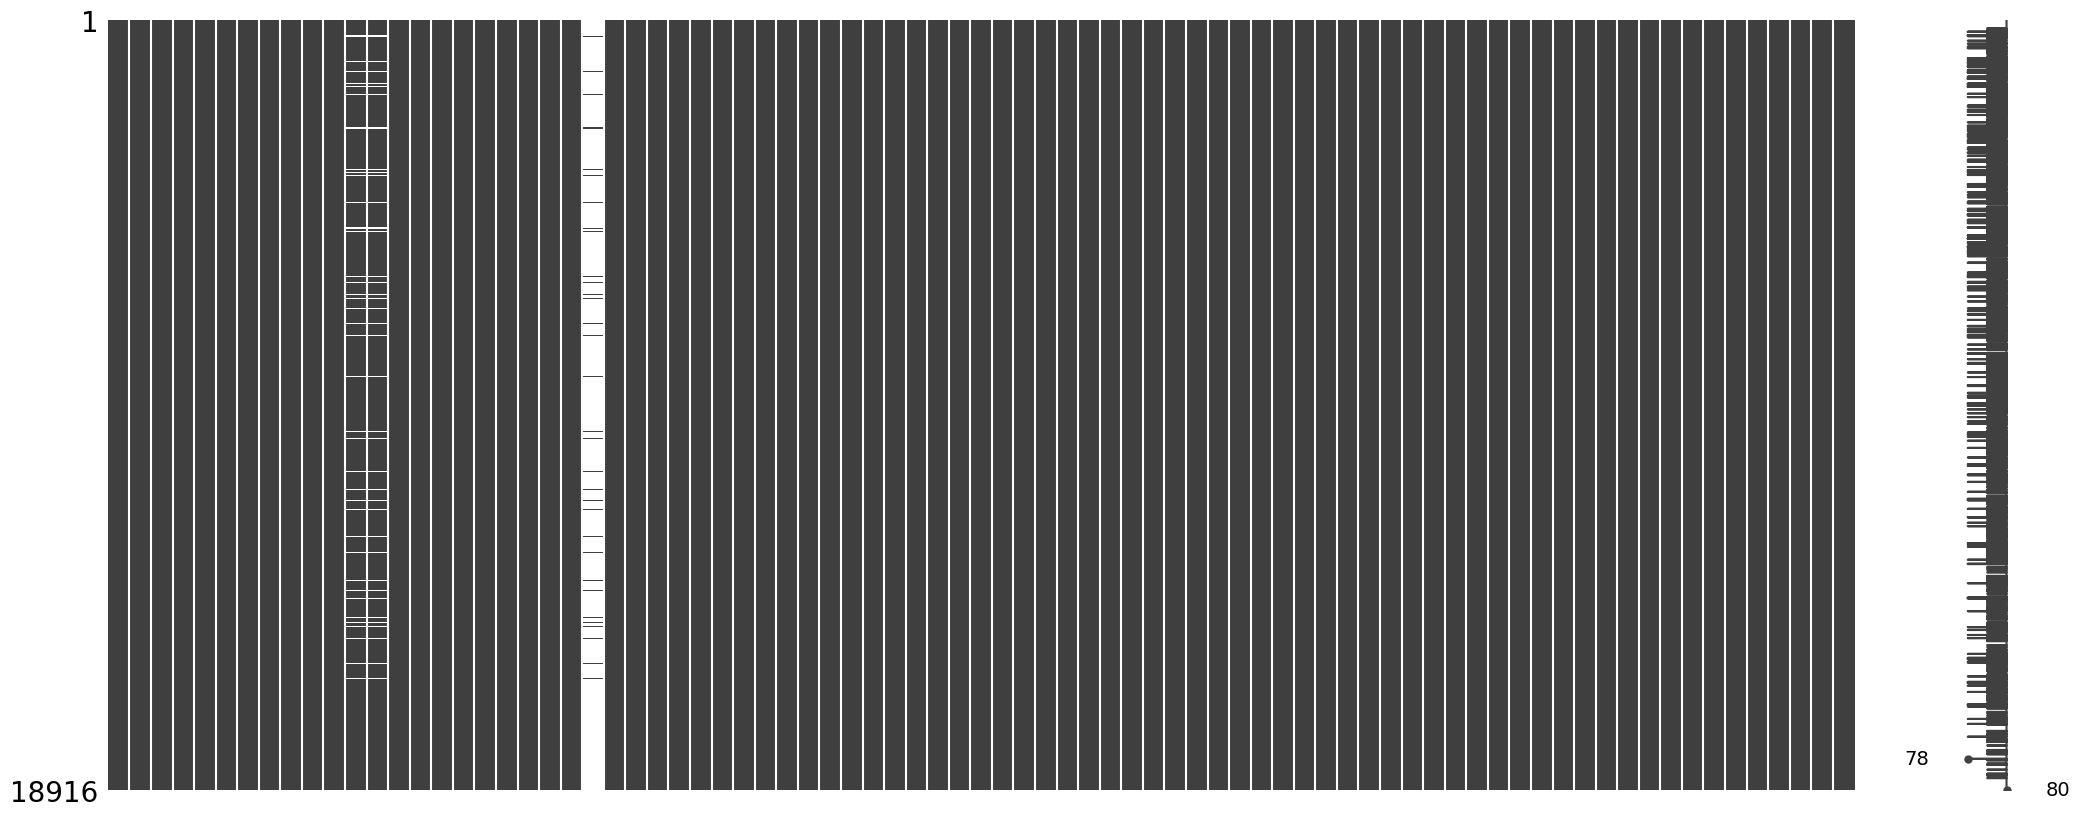

In [181]:
msno.matrix(dataset)
plt.show()

In [182]:
hits_missing = dataset[dataset['hits'].isna()]
hits_complete = dataset[~dataset['hits'].isna()]

In [183]:
hits_missing.describe()

,id,age,↓ova,pot,contract length(years),height(cm),weight(kg),bov,value,wage,...,gk reflexes,total stats,base stats,pac,sho,pas,dri,def,phy,hits
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [184]:
hits_complete.describe()

,id,age,↓ova,pot,contract length(years),height(cm),weight(kg),bov,value,wage,...,gk reflexes,total stats,base stats,pac,sho,pas,dri,def,phy,hits
count,18916.000000,18916.000000,18916.000000,18916.000000,18916.000000,18916.000000,18916.000000,18916.000000,1.891600e+04,18916.000000,...,18916.000000,18916.000000,18916.000000,18916.000000,18916.000000,18916.000000,18916.000000,18916.000000,18916.000000,18916.000000
mean,226369.708924,25.196447,65.733929,71.150455,3.493656,181.206122,75.024794,66.767287,1.248685e+06,9113.633961,...,16.519454,1595.656481,355.777437,67.461884,53.475946,57.696342,62.893159,49.871114,64.378991,20.353034
std,27157.761812,4.711345,6.967937,6.109745,2.402288,6.839782,7.073831,6.745781,5.607541e+06,19735.562505,...,17.858240,269.868053,40.770870,10.678191,13.827757,10.087153,9.929578,16.449671,9.601321,78.046082
min,41.000000,16.000000,47.000000,47.000000,0.000000,155.000000,50.000000,48.000000,0.000000e+00,0.000000,...,2.000000,747.000000,232.000000,25.000000,16.000000,25.000000,25.000000,12.000000,28.000000,0.000000
25%,210040.250000,21.000000,61.000000,67.000000,2.000000,176.000000,70.000000,62.000000,2.000000e+00,1000.000000,...,8.000000,1452.000000,327.000000,61.000000,44.000000,51.000000,57.000000,35.000000,58.000000,1.000000
50%,232389.500000,25.000000,66.000000,71.000000,3.000000,181.000000,75.000000,67.000000,2.500000e+05,3000.000000,...,11.000000,1627.000000,356.000000,68.000000,56.000000,58.000000,64.000000,53.000000,65.000000,4.000000
75%,246911.750000,29.000000,70.000000,75.000000,5.000000,186.000000,80.000000,71.000000,6.250000e+05,8000.000000,...,14.000000,1781.000000,384.000000,75.000000,64.000000,65.000000,69.000000,63.000000,71.000000,12.000000
max,259216.000000,53.000000,93.000000,95.000000,23.000000,206.000000,110.000000,93.000000,1.320000e+08,560000.000000,...,90.000000,2316.000000,498.000000,96.000000,93.000000,93.000000,95.000000,91.000000,91.000000,6000.000000


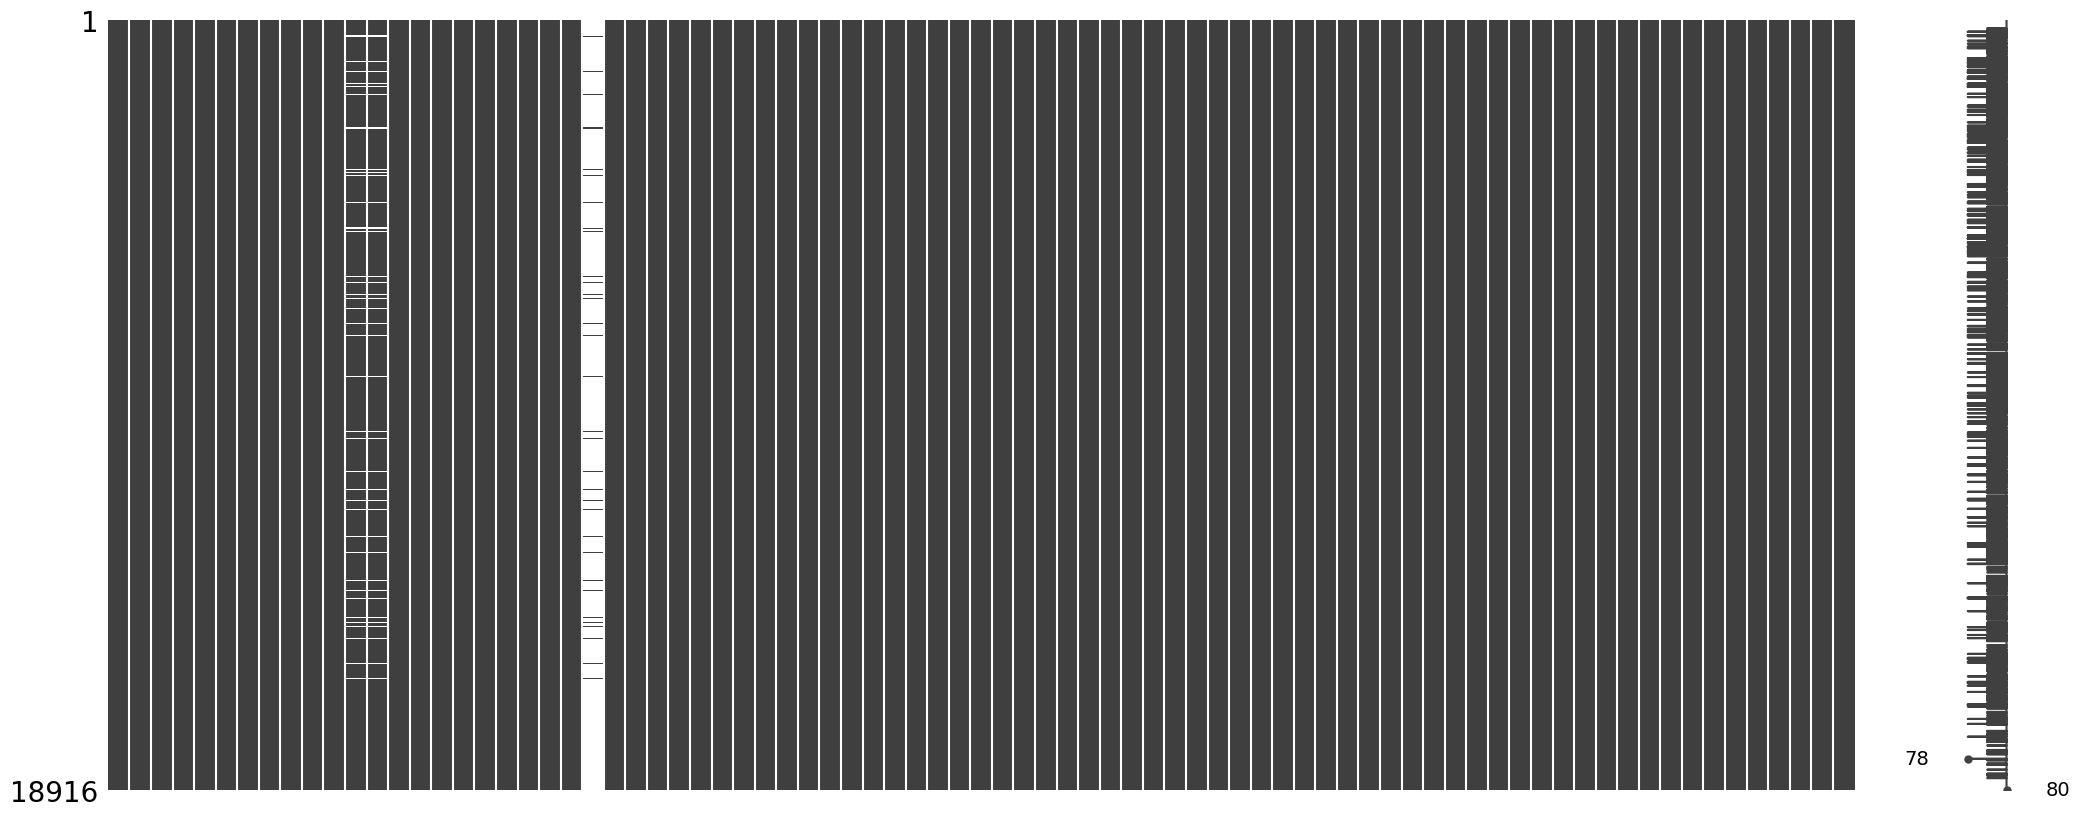

In [185]:
msno.matrix(hits_complete)
plt.show()